# Part 1 | Visualizing Economic Data

## Part 1.6 | Transforming Data

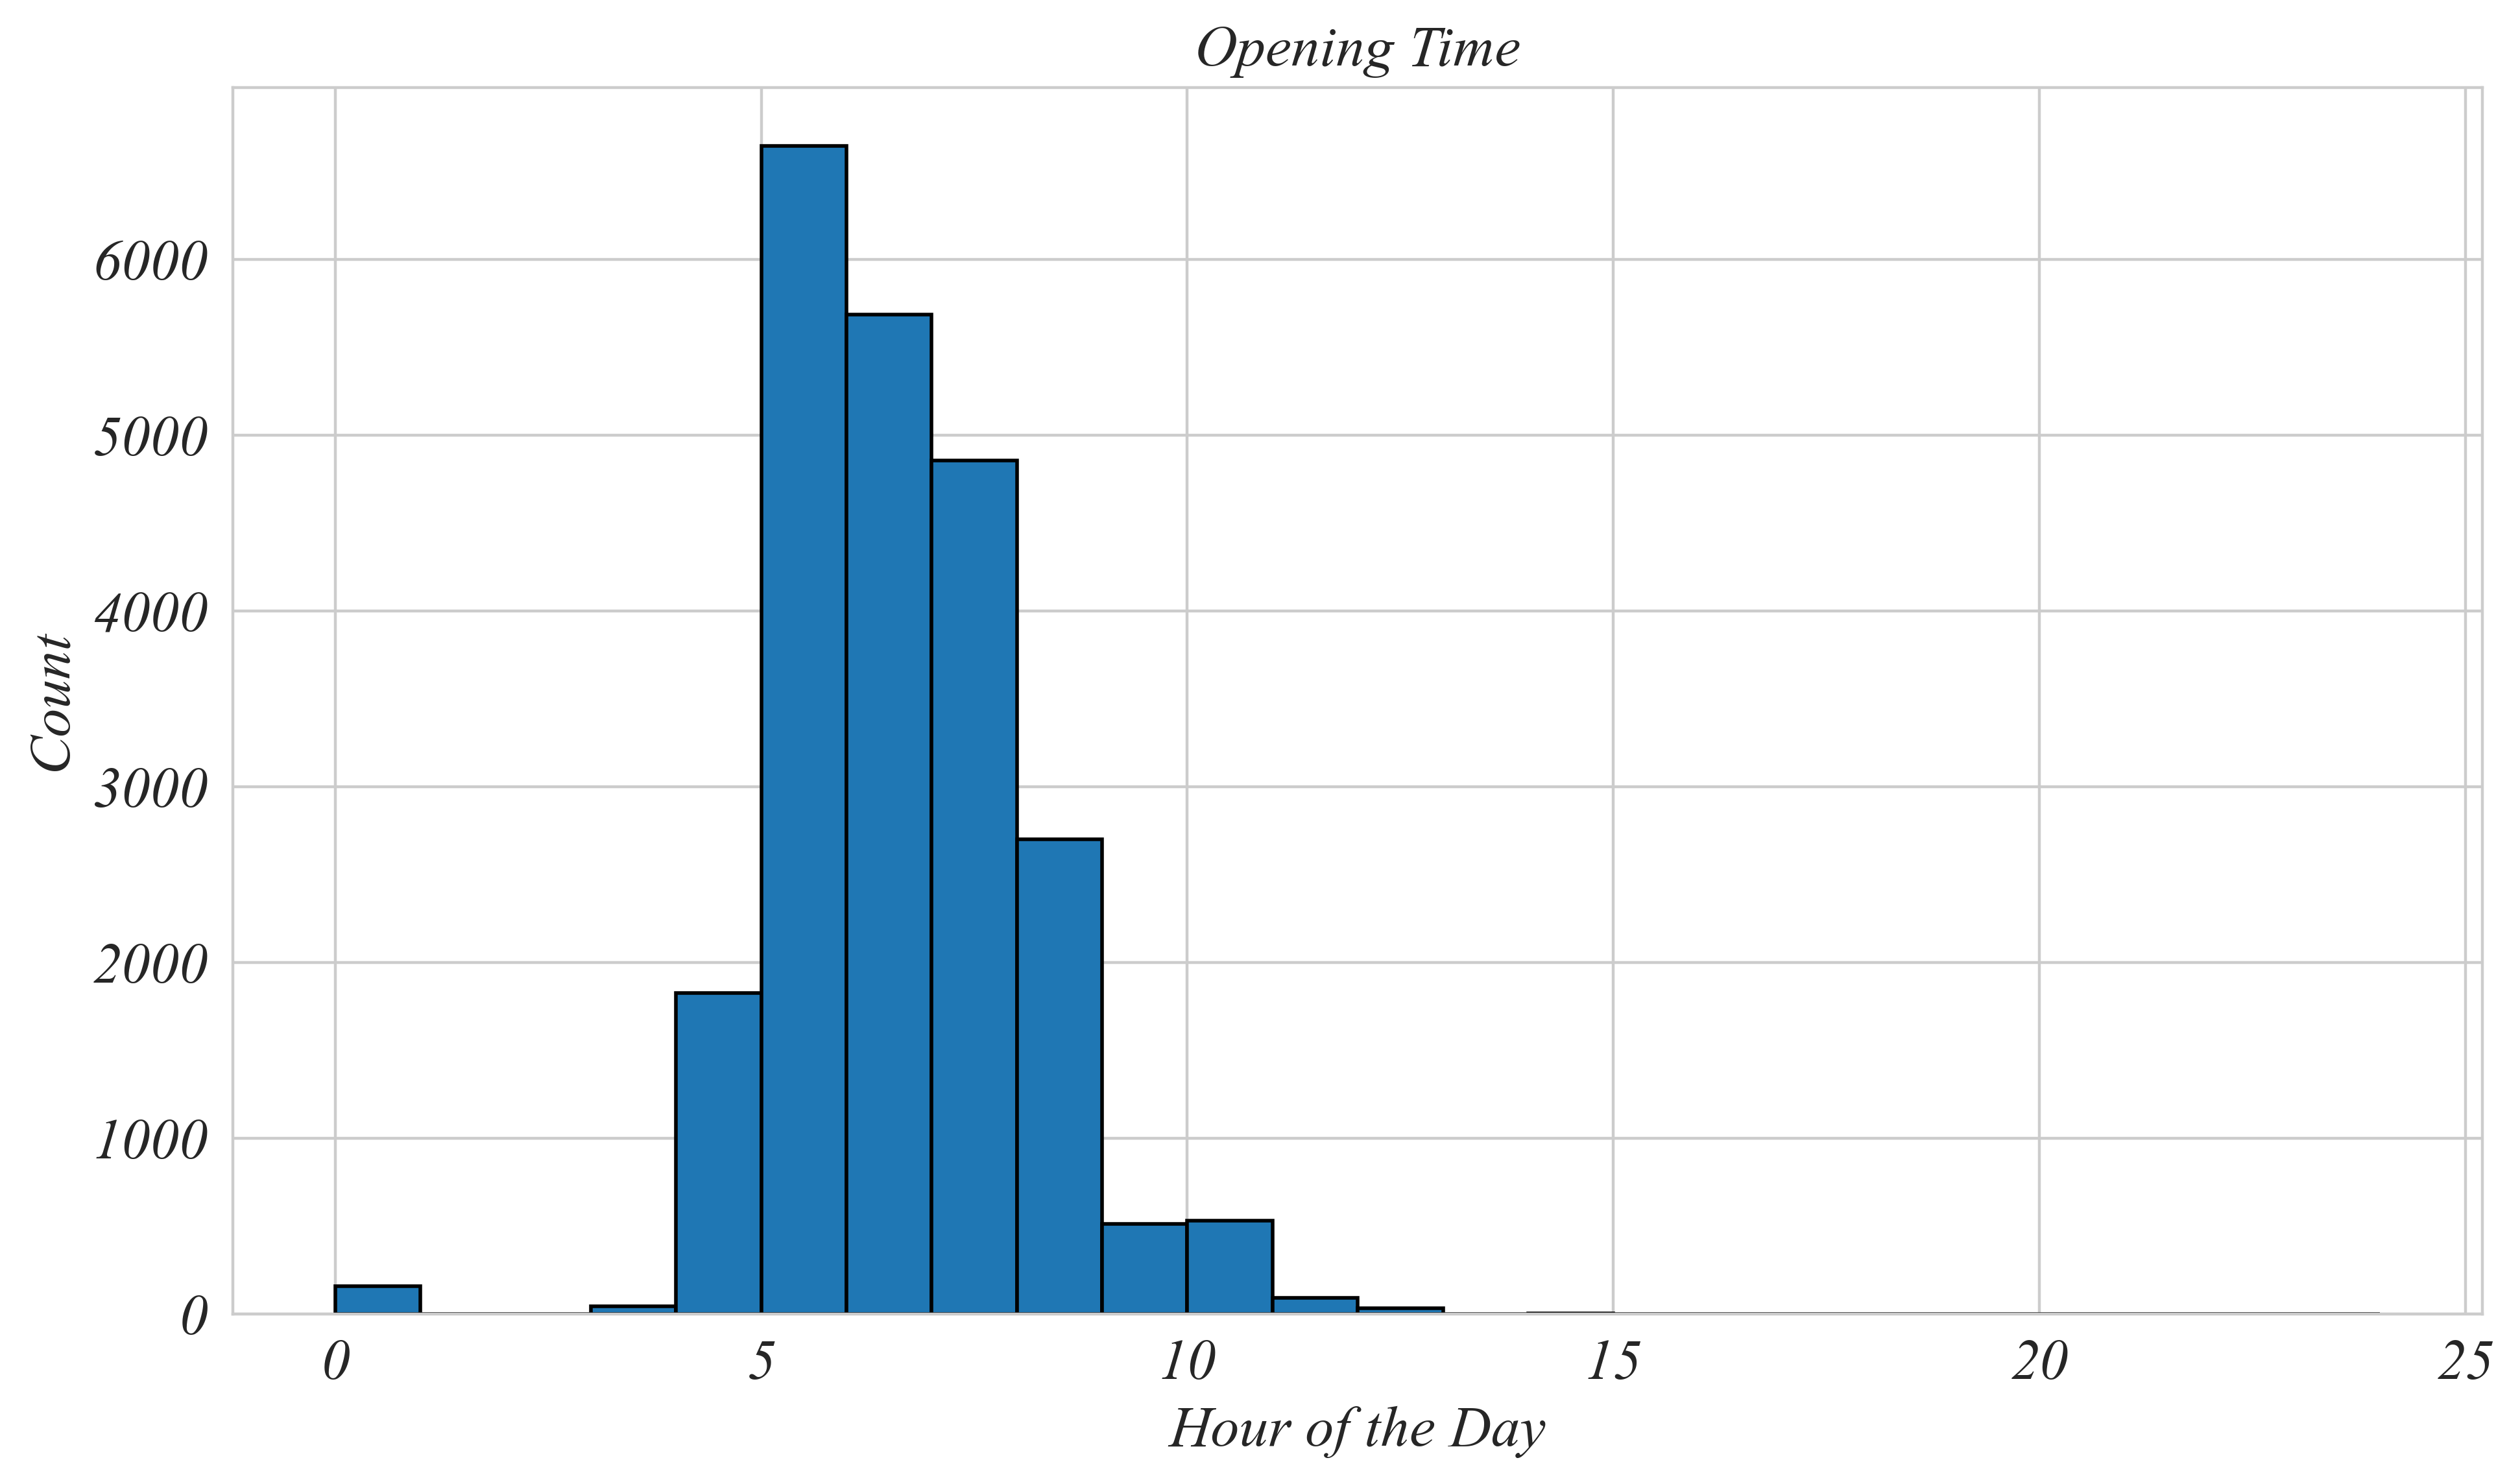

In [106]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

bin_edges = np.arange(0, 25, 1)
plt.hist(hours.open, bins=bin_edges, edgecolor='black')

plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Opening Time')
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Open_Hist_Raw.png')

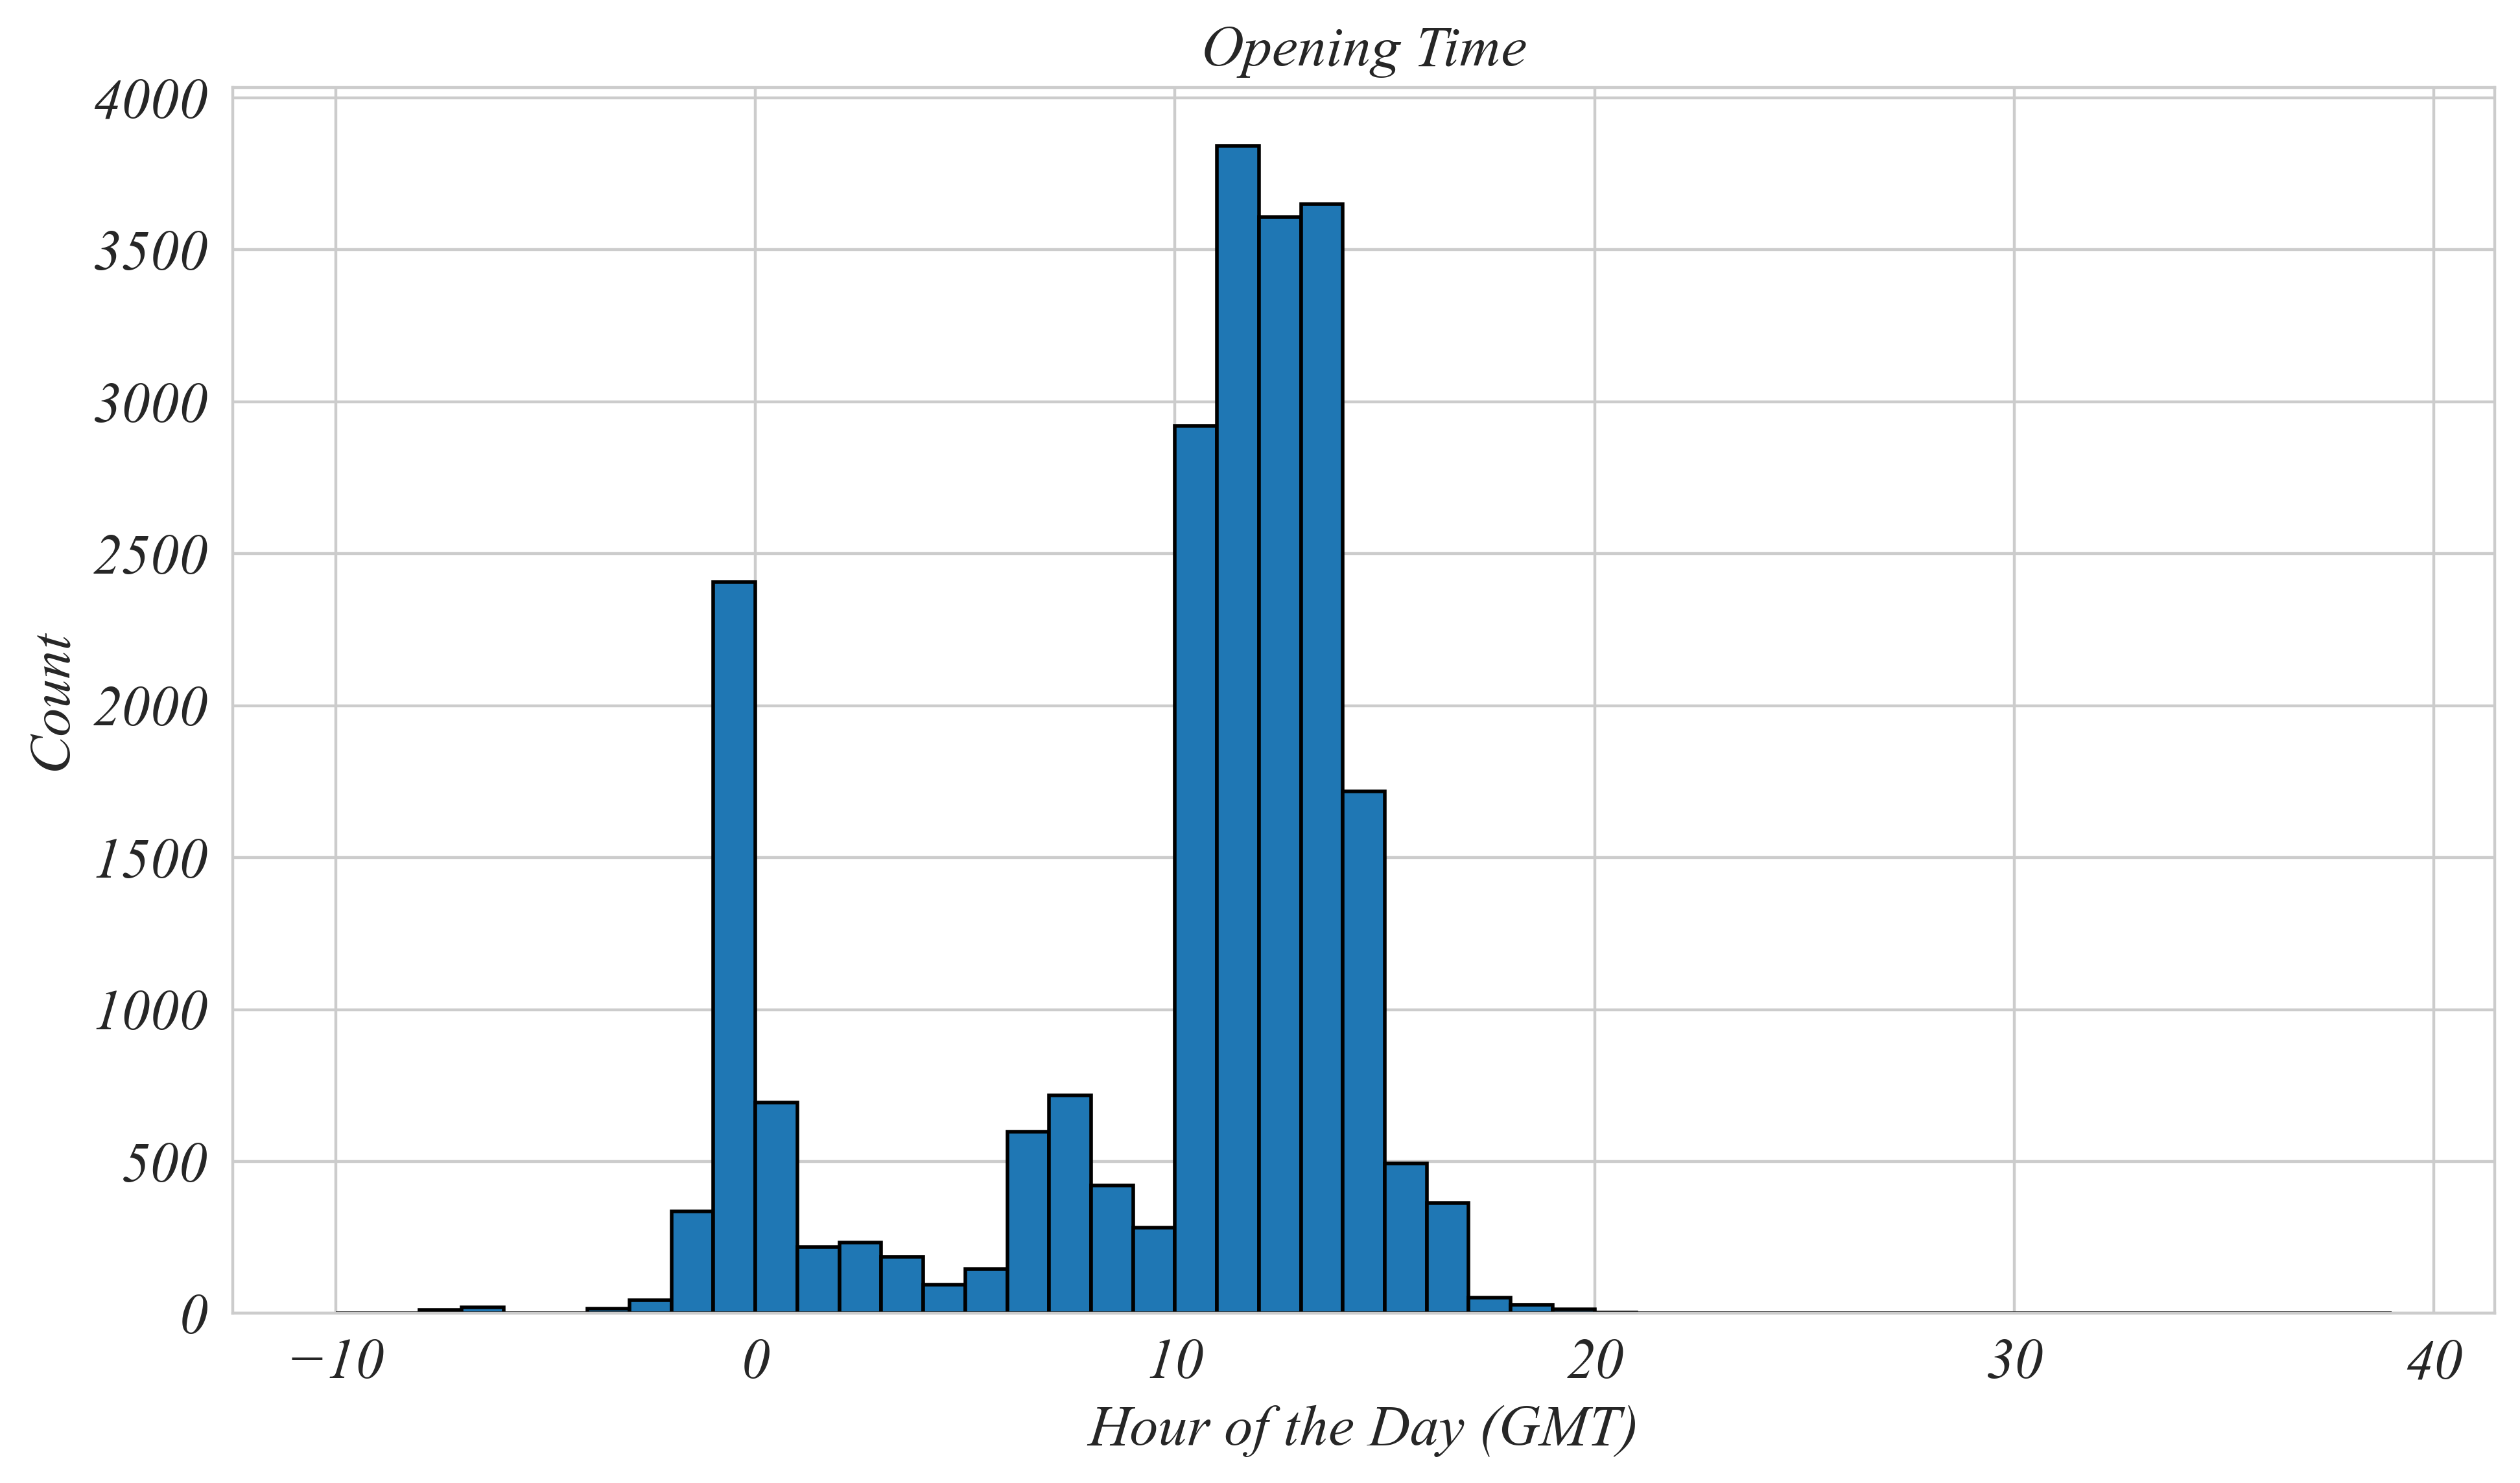

In [107]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['open_GMT'] = hours['open'] - hours['timezone']

bin_edges = np.arange(-10, 40, 1)

plt.hist(hours.open_GMT, bins=bin_edges, edgecolor='black')

plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Count')
plt.title('Opening Time')
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Open_Hist_GMT.png')

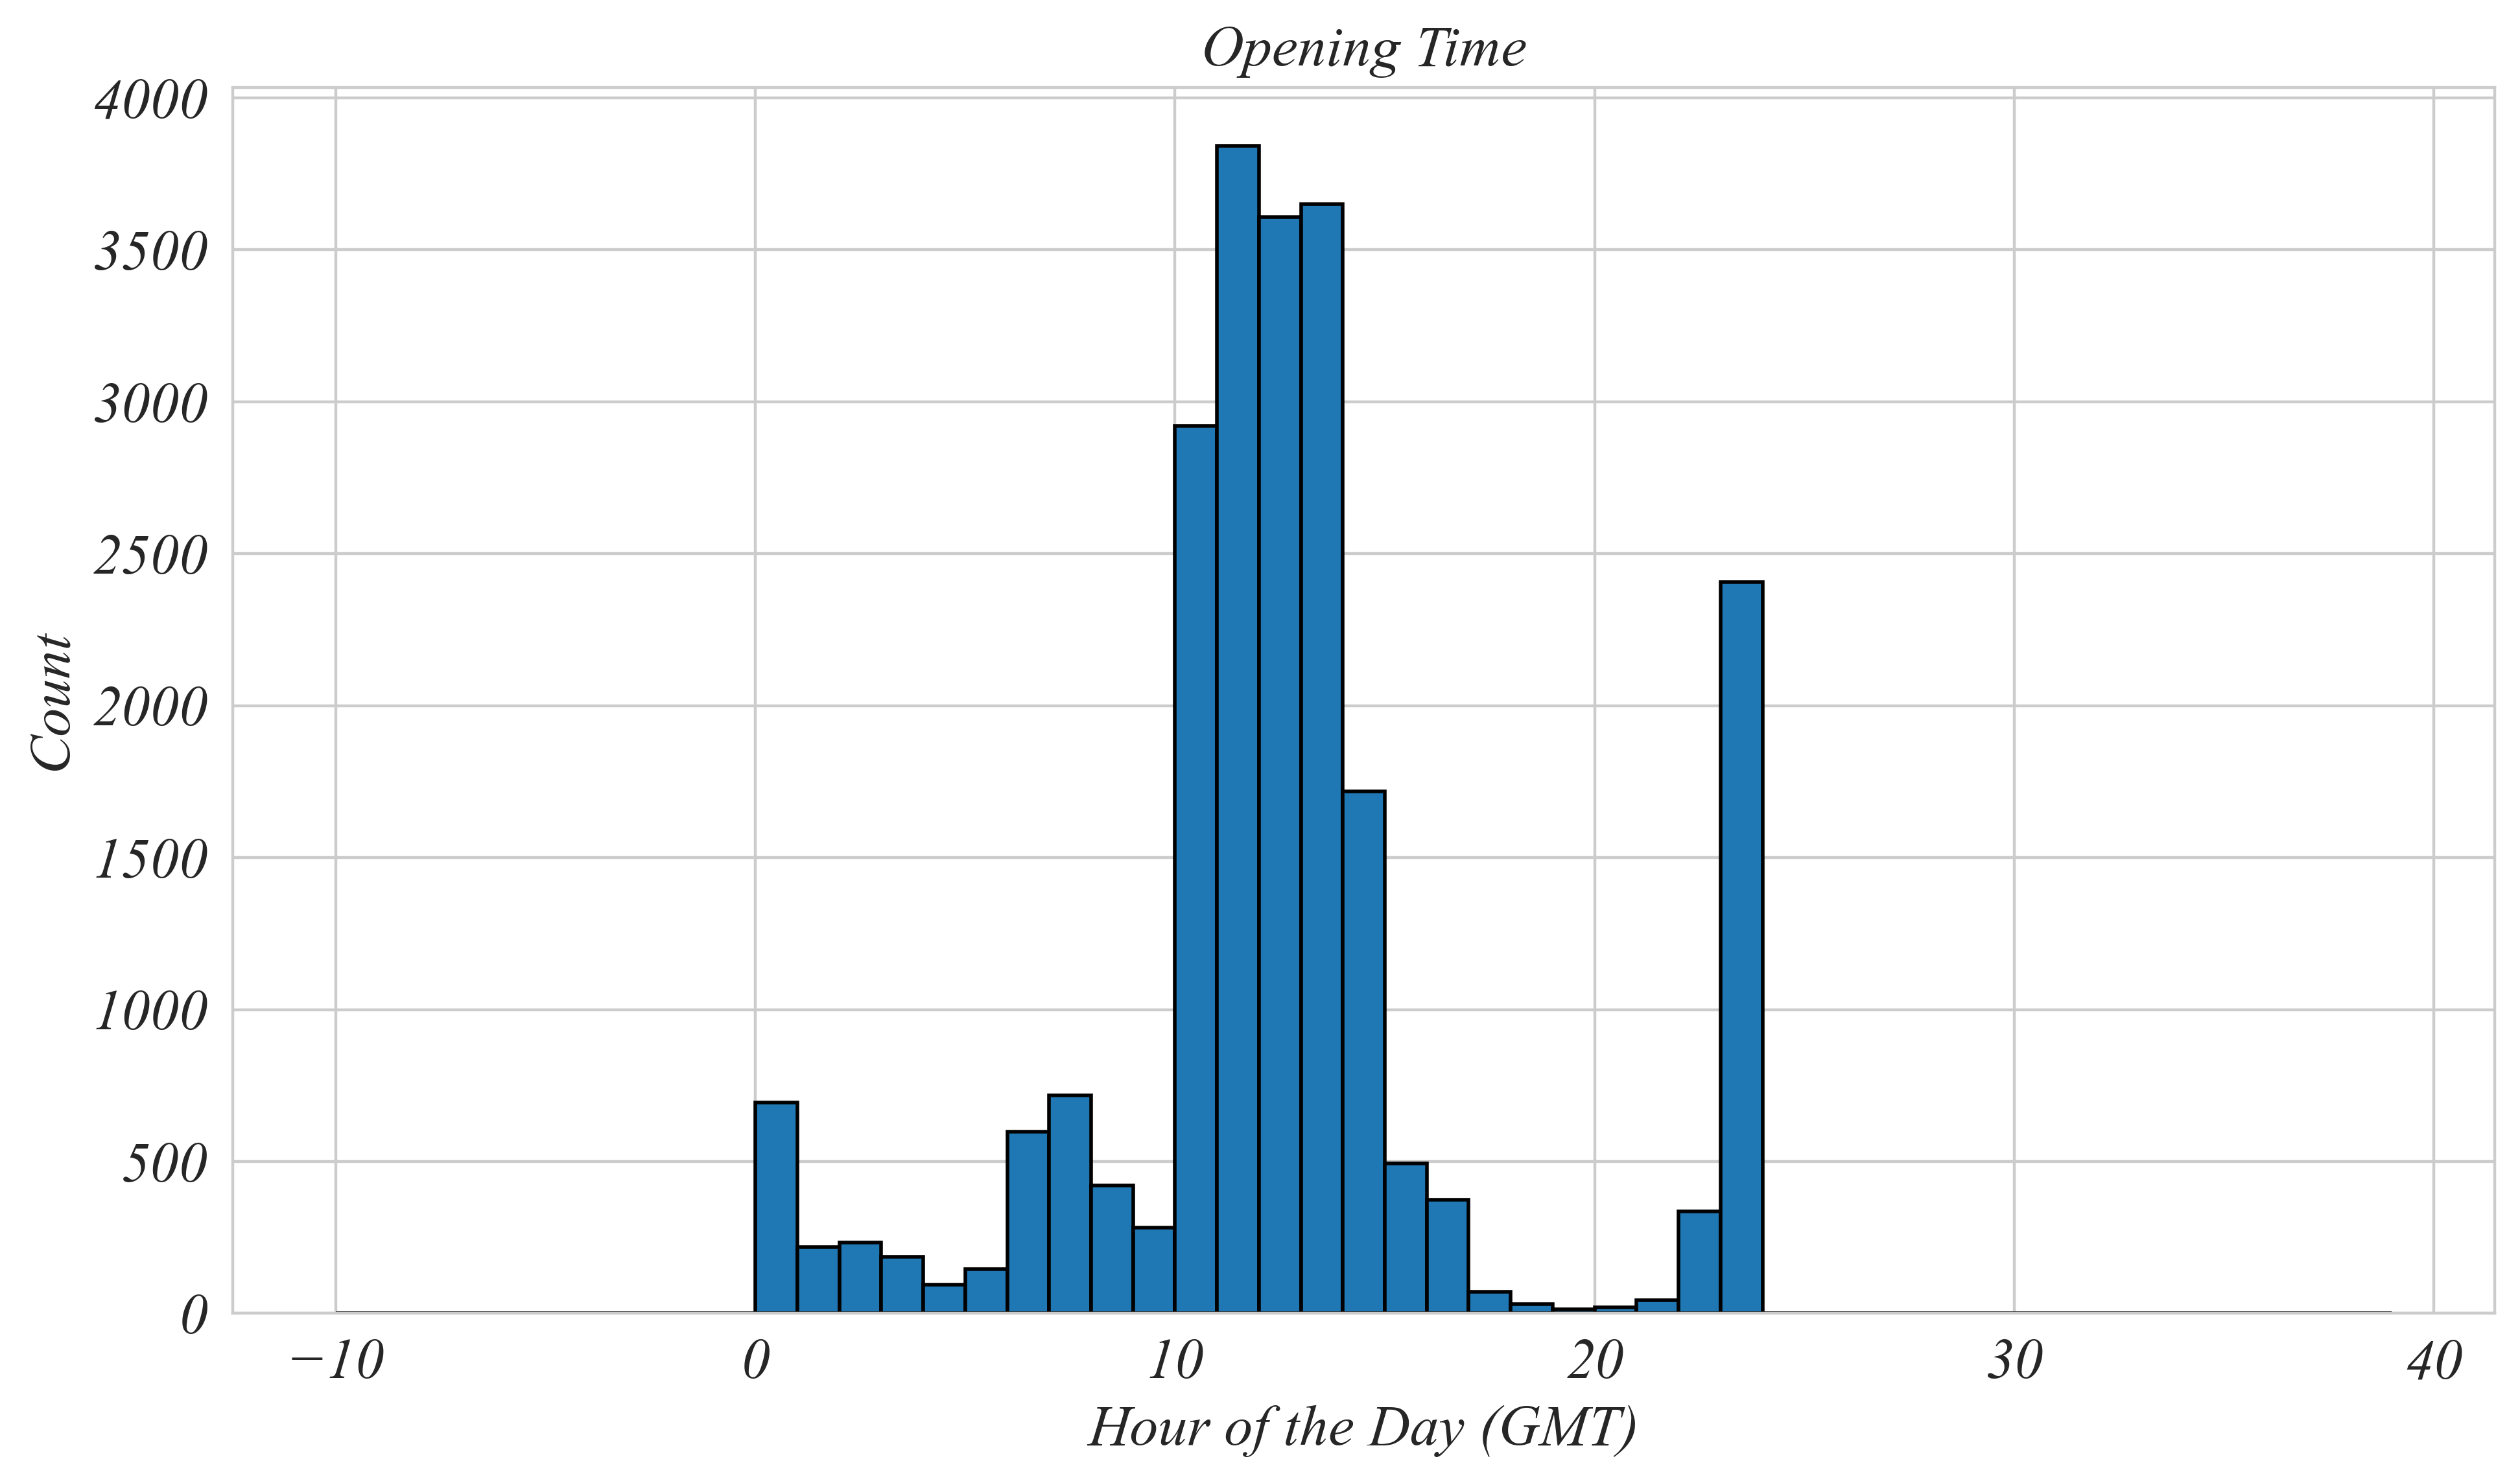

In [108]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['open_GMT'] = hours['open'] - hours['timezone']

def Normalize_GMT(number):
    if number >= 24:
        number = number - 24
    if number < 0:
        number = number + 24
    return number

hours['open_GMT'] = hours['open_GMT'].apply(Normalize_GMT)

bin_edges = np.arange(-10, 40, 1)

plt.hist(hours.open_GMT, bins=bin_edges, edgecolor='black')

plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Count')
plt.title('Opening Time')
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Open_Hist_GMT_Norm.png')

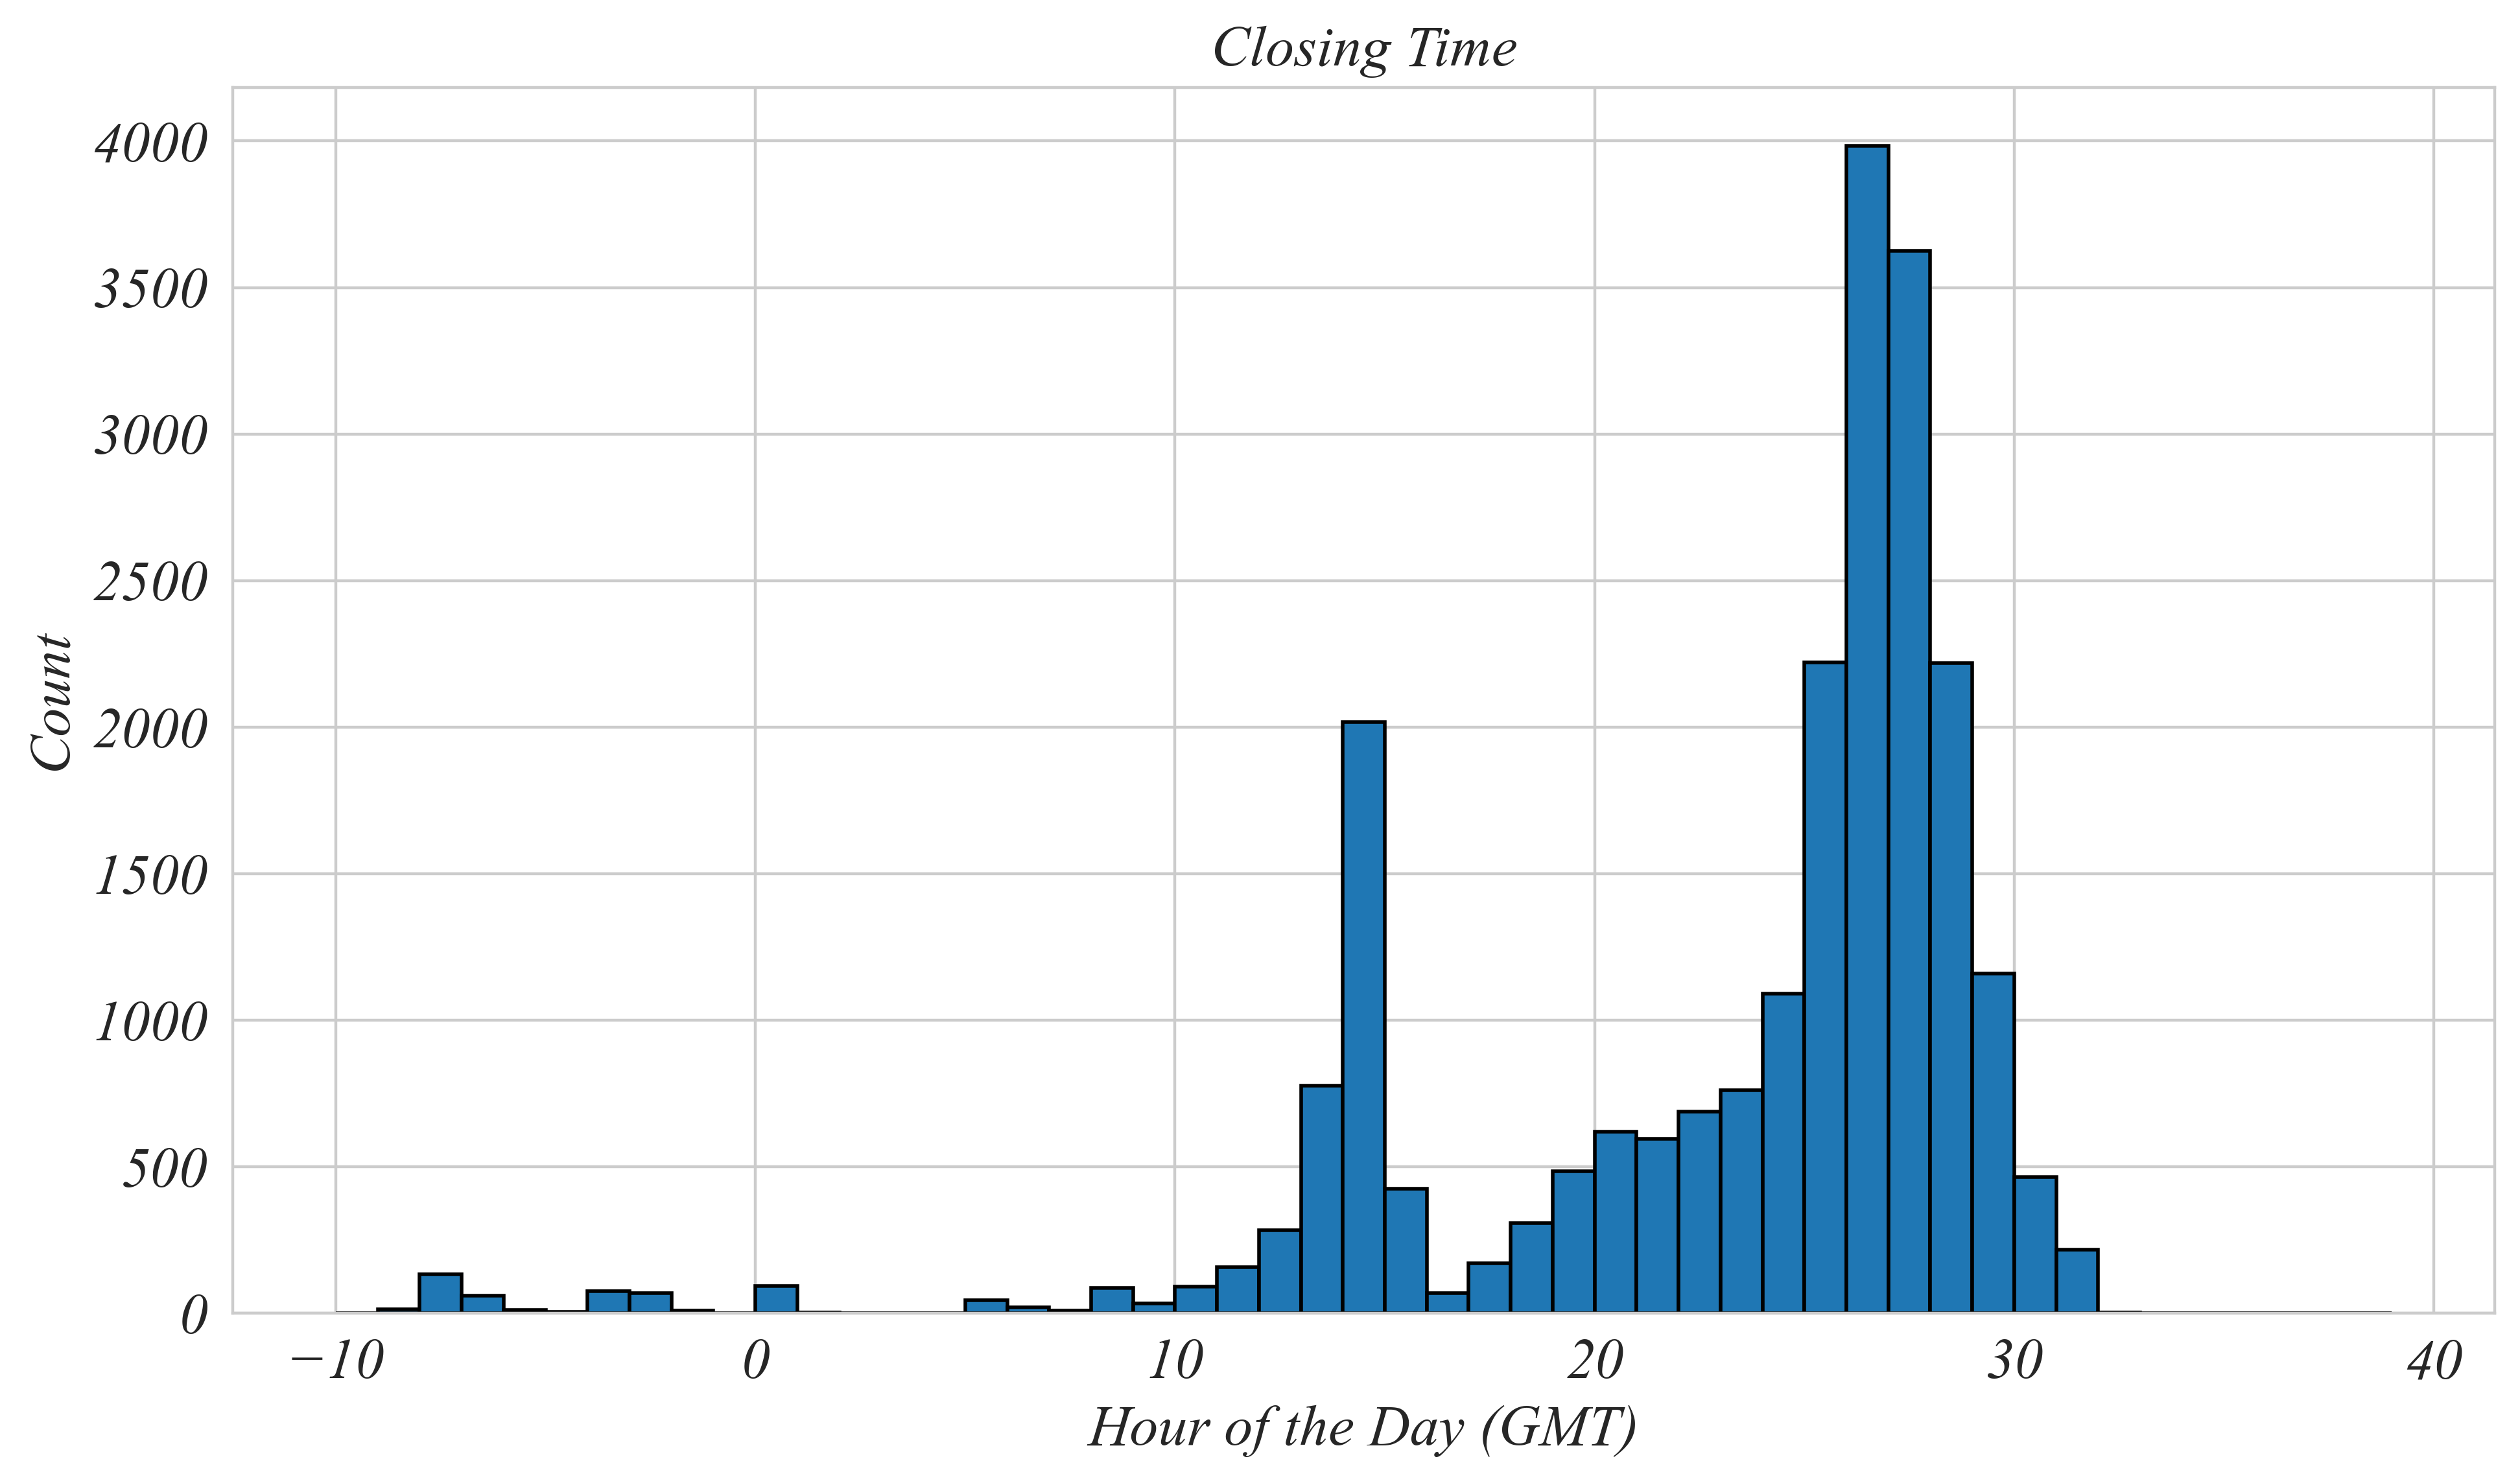

In [109]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['close_GMT'] = hours['close'] - hours['timezone']

bin_edges = np.arange(-10, 40, 1)

plt.hist(hours.close_GMT, bins=bin_edges, edgecolor='black')

plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Count')
plt.title('Closing Time')
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Close_Hist_GMT.png')

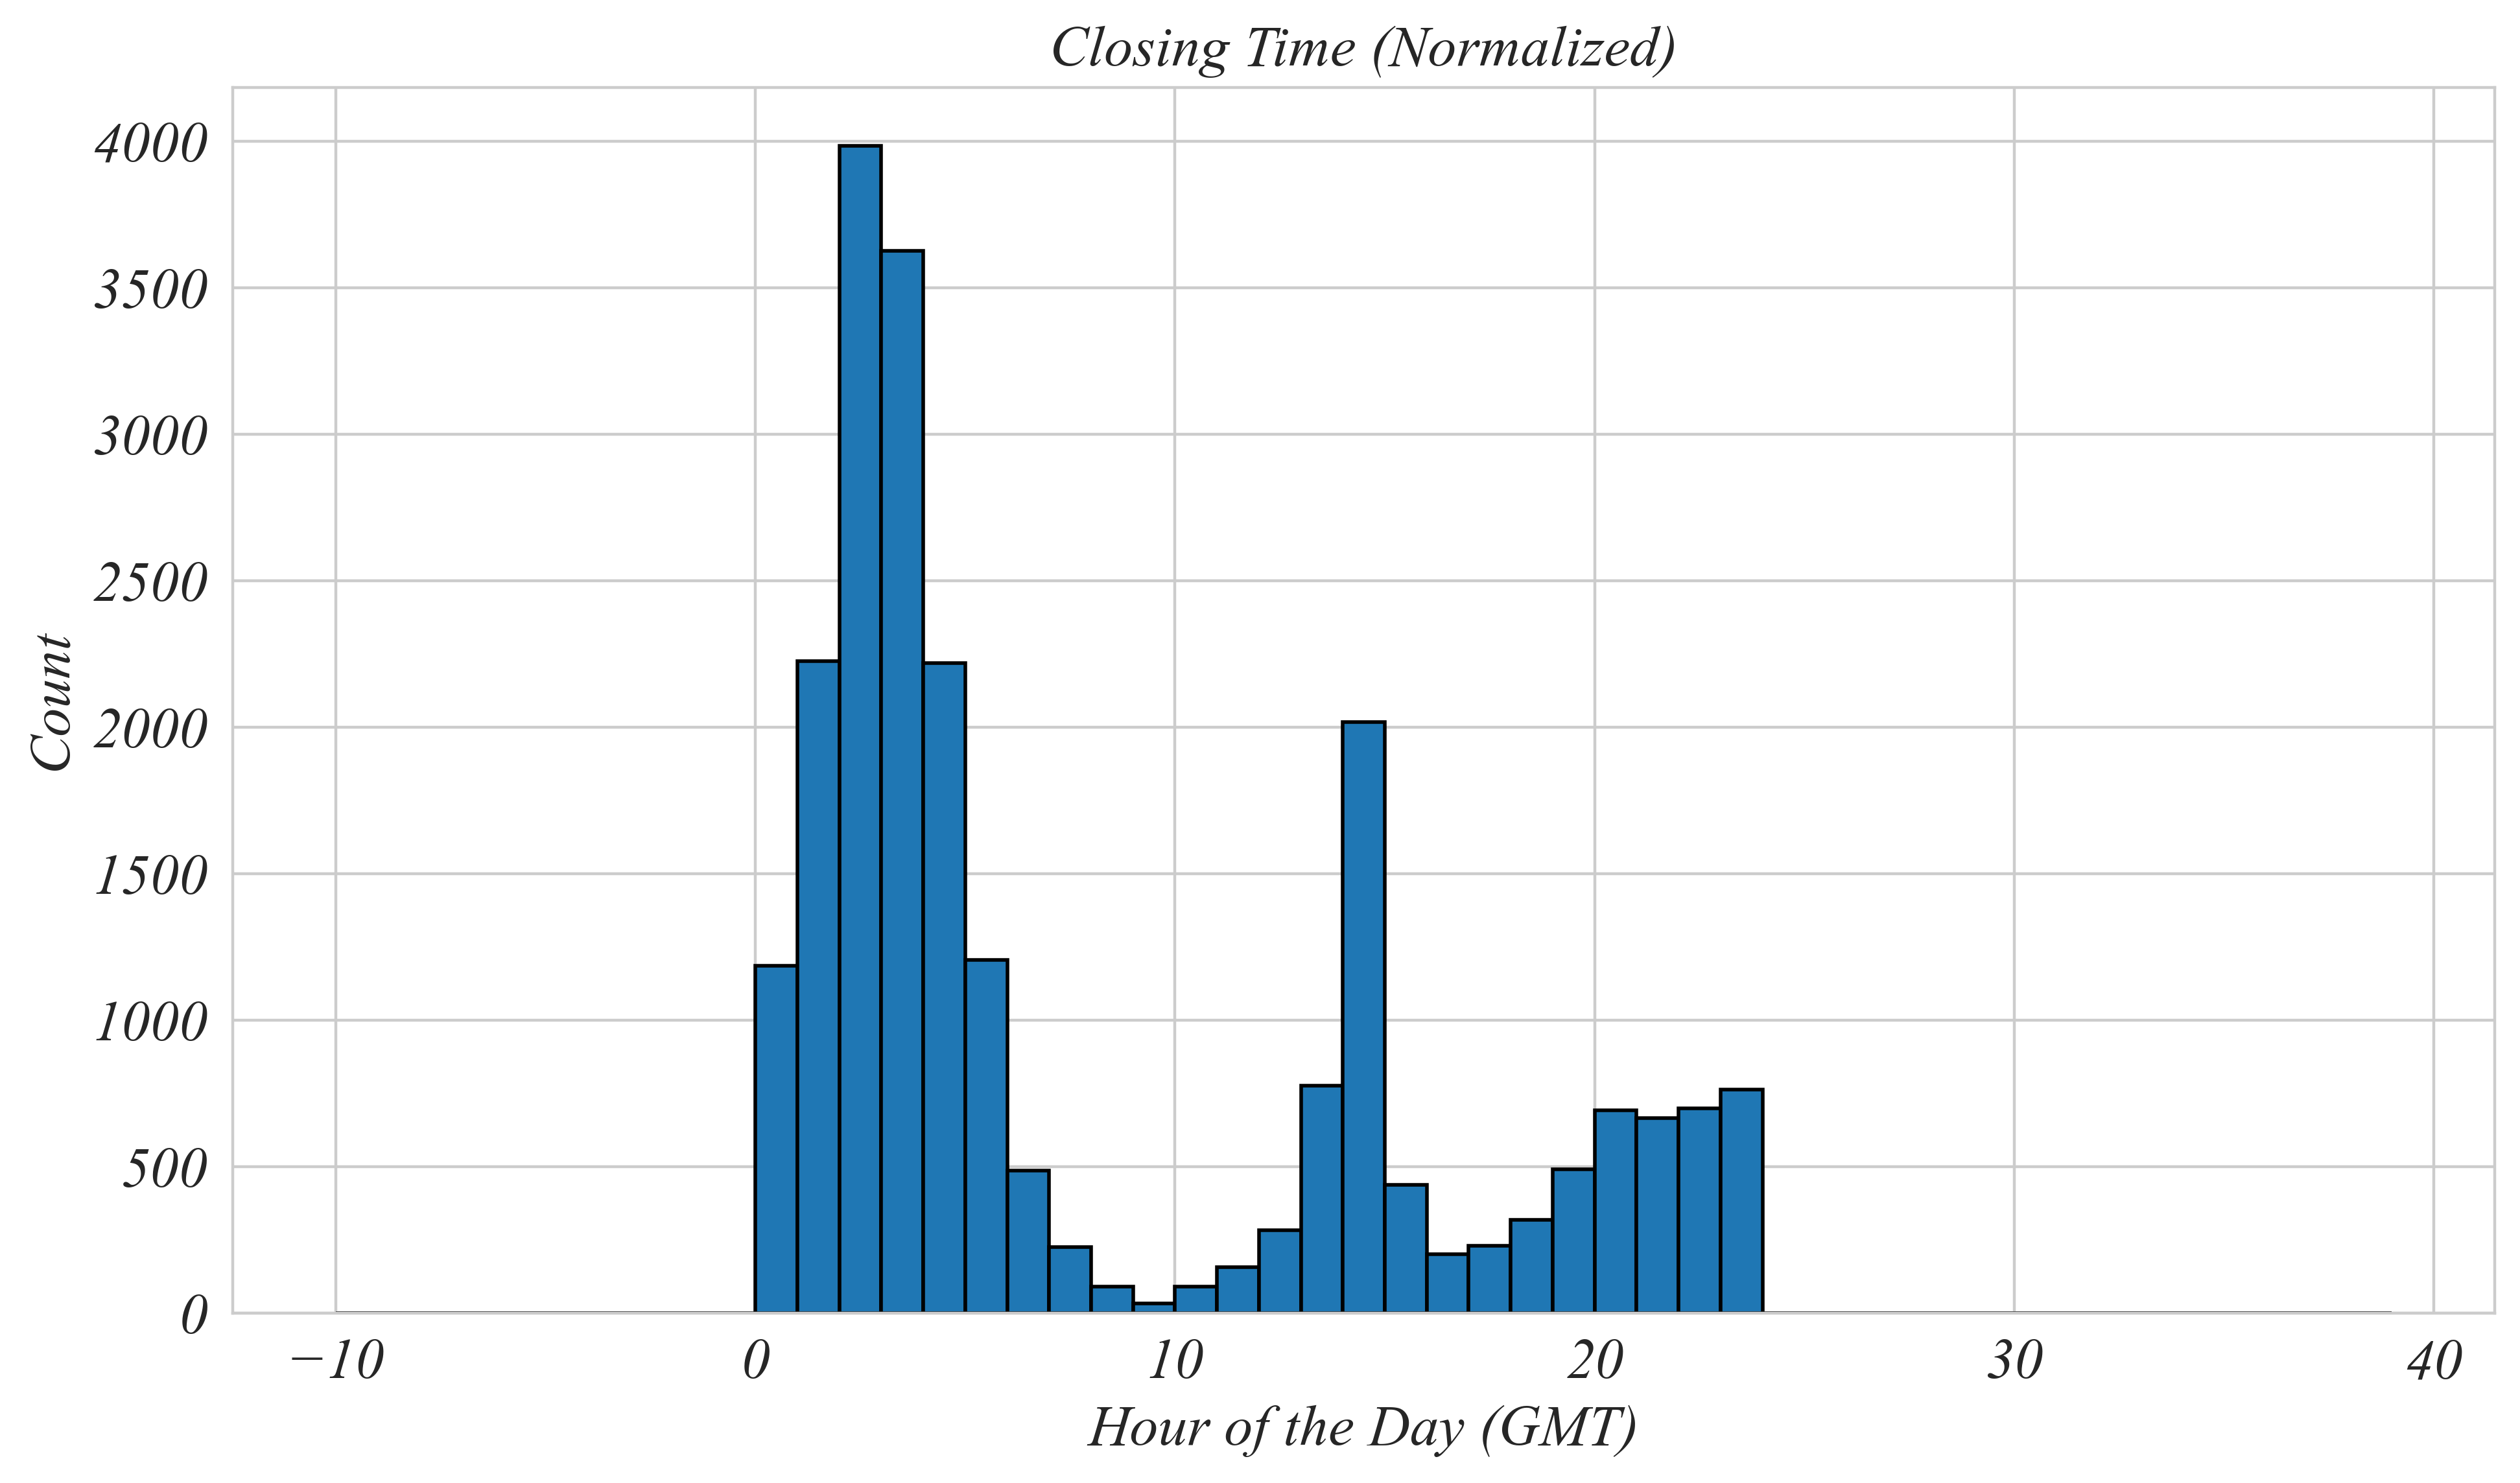

In [110]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['close_GMT'] = hours['close'] - hours['timezone']

def Normalize_GMT(number):
    if number >= 24:
        number = number - 24
    if number < 0:
        number = number + 24
    return number

hours['close_GMT'] = hours['close_GMT'].apply(Normalize_GMT)

bin_edges = np.arange(-10, 40, 1)

plt.hist(hours.close_GMT, bins=bin_edges, edgecolor='black')

plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Count')
plt.title('Closing Time (Normalized)')
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Close_Hist_GMT_Norm.png')

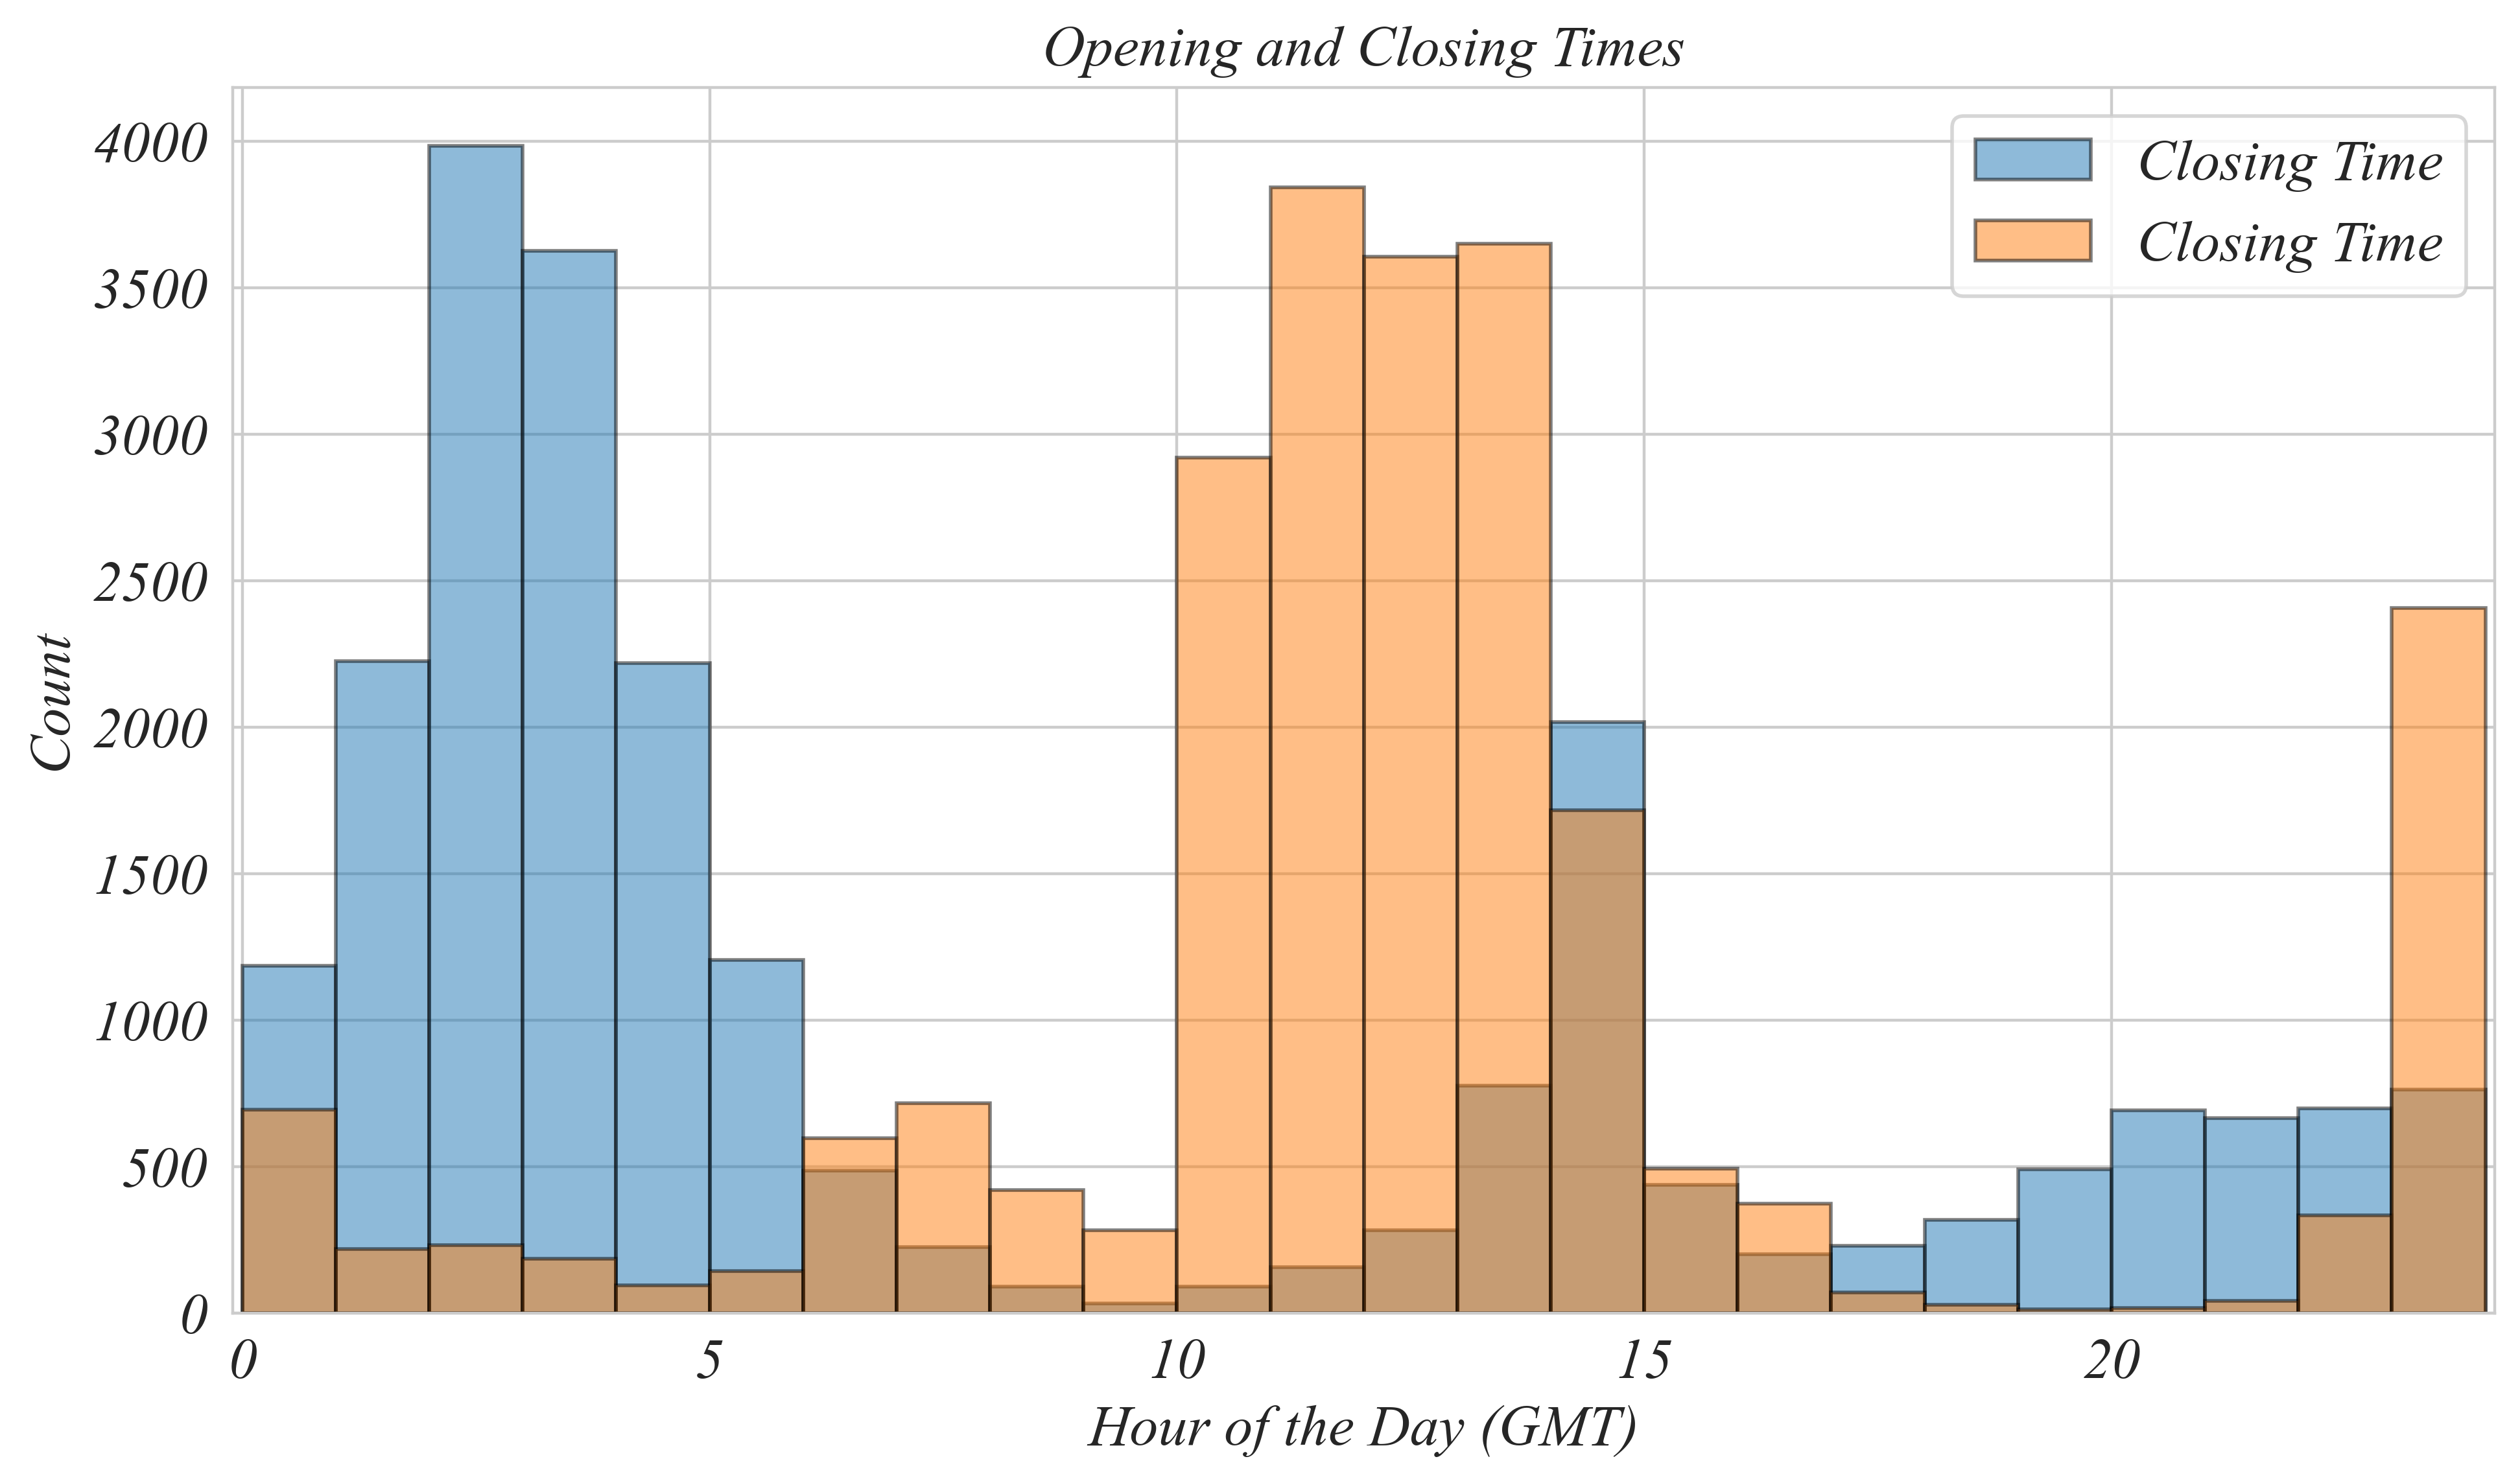

In [111]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['close_GMT'] = hours['close'] - hours['timezone']
hours['open_GMT'] = hours['open'] - hours['timezone']

def Normalize_GMT(number):
    if number >= 24:
        number = number - 24
    if number < 0:
        number = number + 24
    return number

hours['close_GMT'] = hours['close_GMT'].apply(Normalize_GMT)
hours['open_GMT'] = hours['open_GMT'].apply(Normalize_GMT)

bin_edges = np.arange(0, 25, 1)

close_counts, bin_edges, patches = plt.hist(hours.close_GMT, bins=bin_edges, edgecolor='black', label = 'Closing Time', alpha=1/2)
open_counts, bin_edges, patches = plt.hist(hours.open_GMT, bins=bin_edges, edgecolor='black', label = 'Closing Time', alpha=1/2)

plt.xlabel('Hour of the Day (GMT)')
plt.legend()
plt.ylabel('Count')
plt.title('Opening and Closing Times')
plt.xlim(-0.1,24.1)
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Total_Hist_GMT.png')

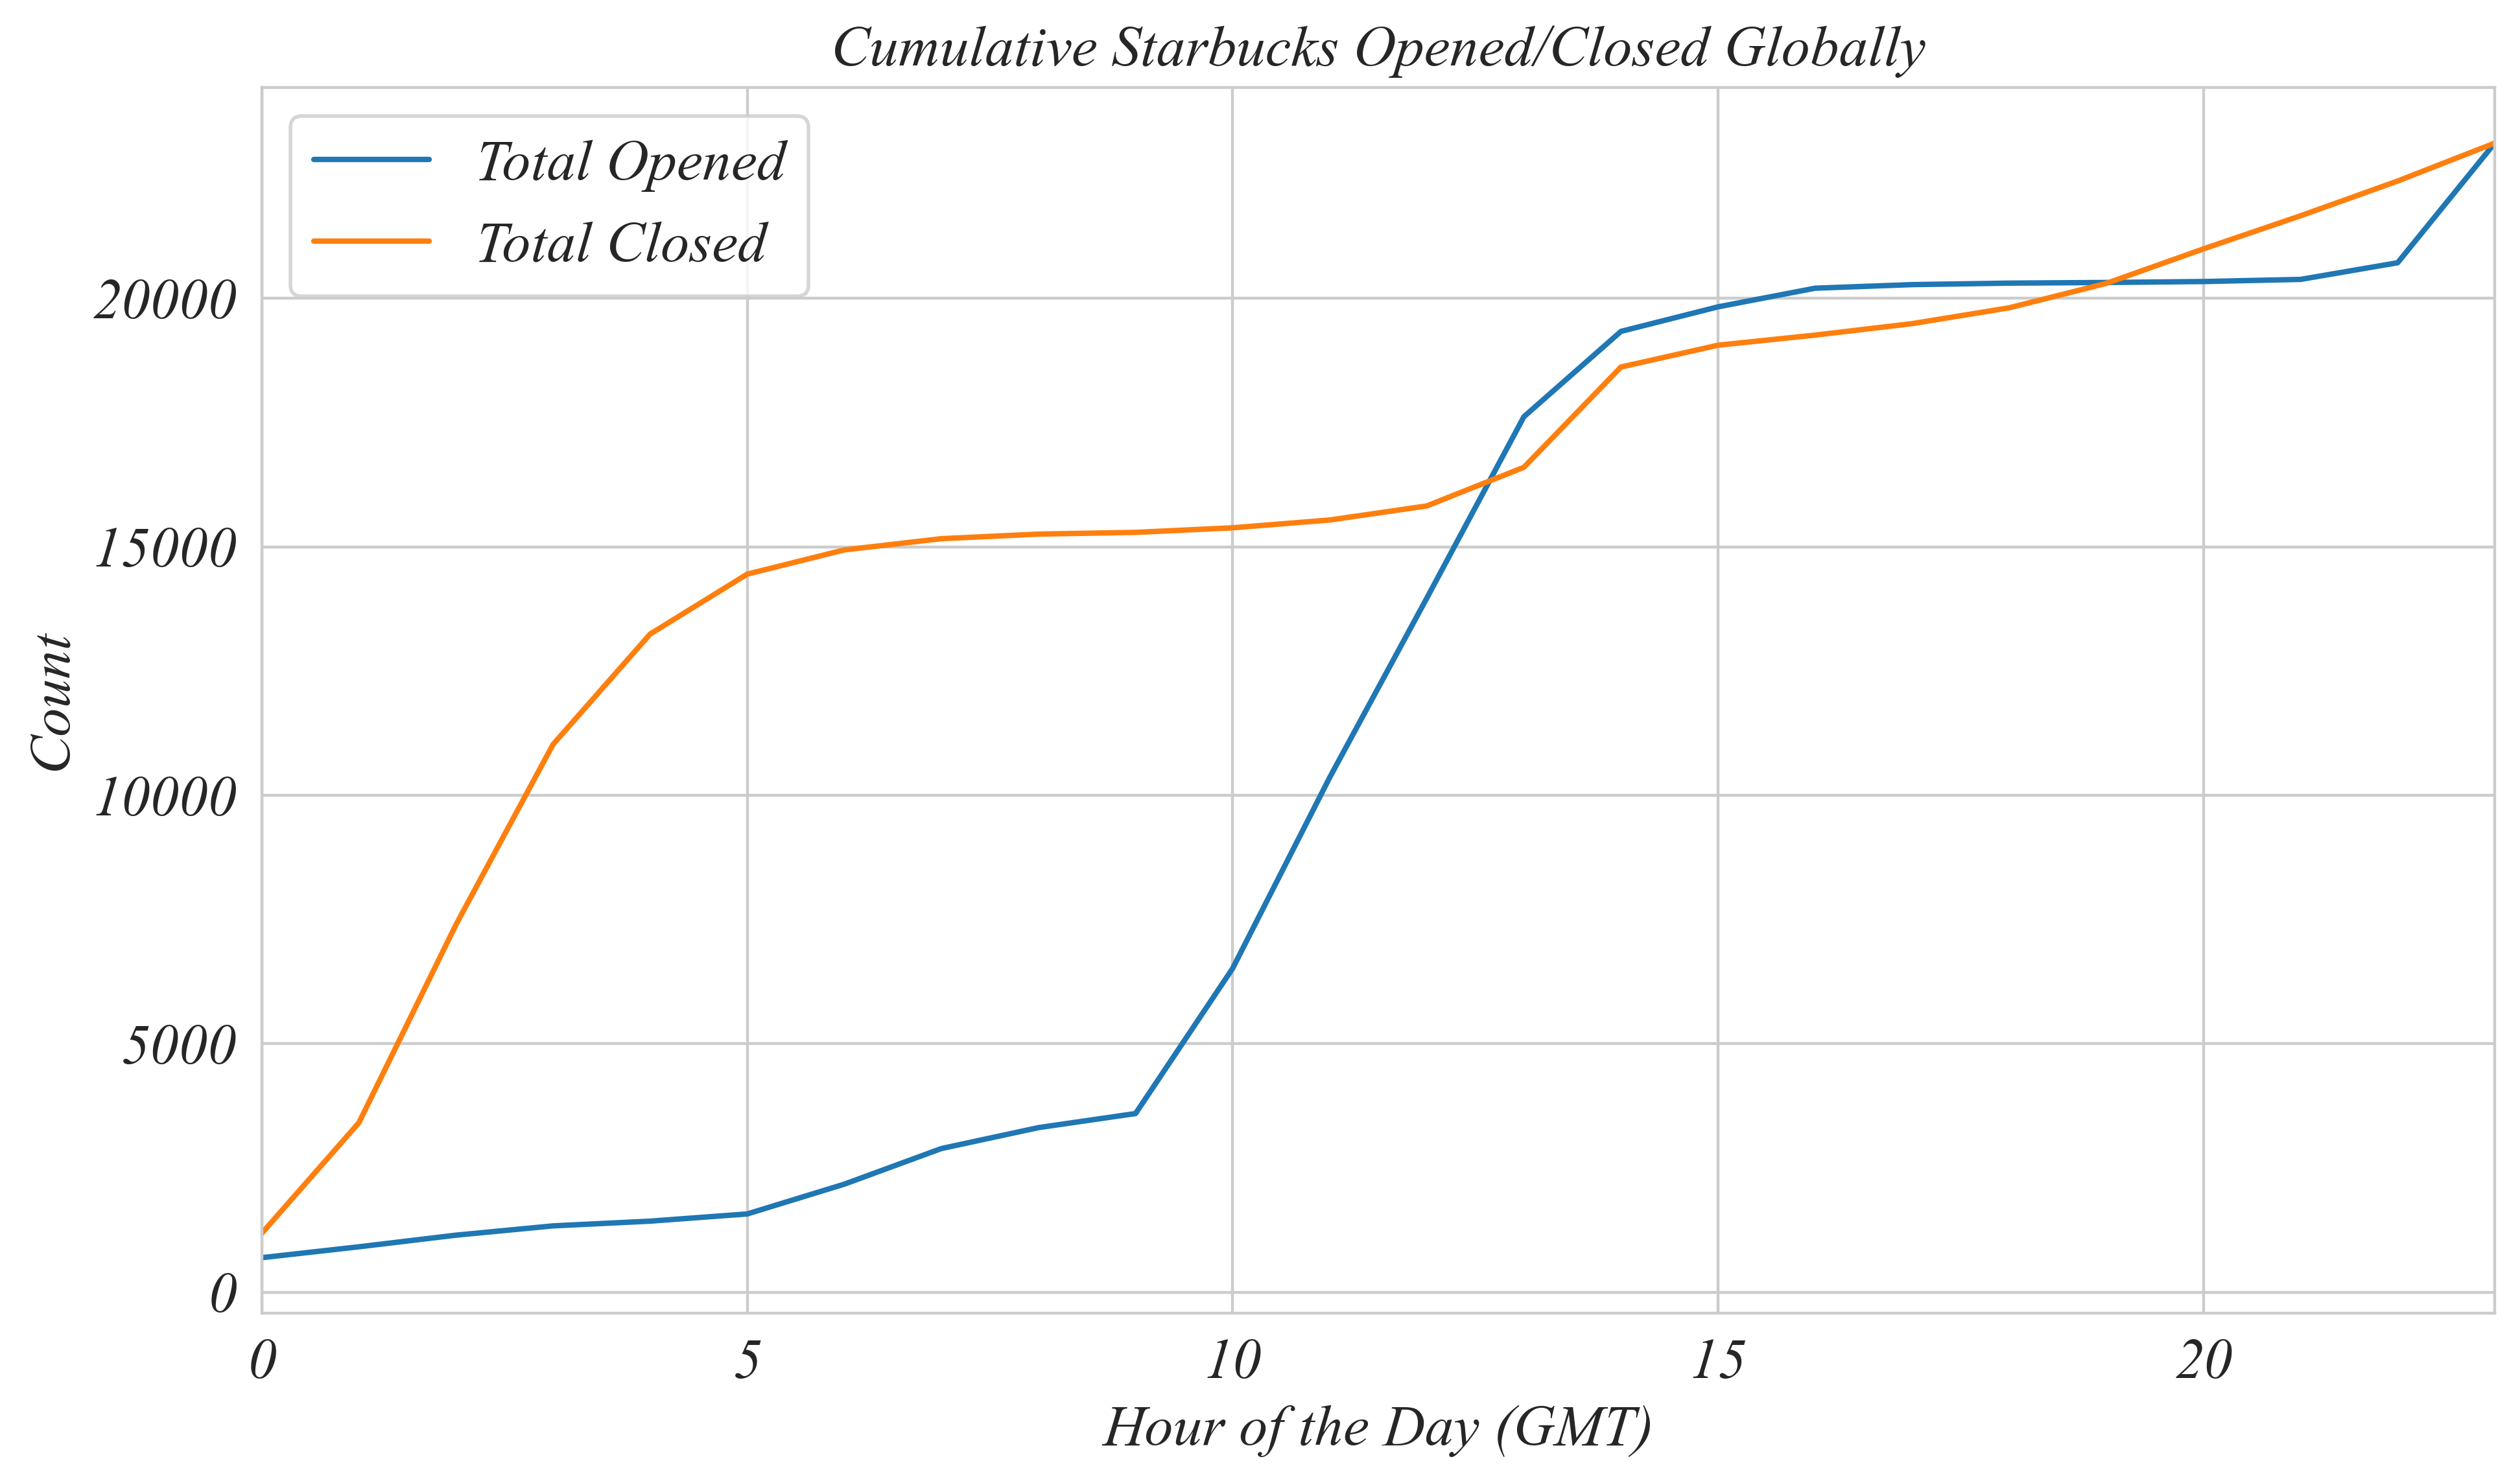

In [112]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['close_GMT'] = hours['close'] - hours['timezone']
hours['open_GMT'] = hours['open'] - hours['timezone']

def Normalize_GMT(number):
    if number >= 24:
        number = number - 24
    if number < 0:
        number = number + 24
    return number

hours['close_GMT'] = hours['close_GMT'].apply(Normalize_GMT)
hours['open_GMT'] = hours['open_GMT'].apply(Normalize_GMT)

bin_edges = np.arange(0, 25, 1)

close_counts, bin_edges = np.histogram(hours.close_GMT, bins=bin_edges)
open_counts, bin_edges = np.histogram(hours.open_GMT, bins=bin_edges)

totals = pd.DataFrame({
    'Bins': bin_edges[:-1],
    'Close Counts': close_counts,
    'Open Counts': open_counts
})

totals['Total Opened'] = totals['Open Counts'].cumsum()
totals['Total Closed'] = totals['Close Counts'].cumsum()

totals['Net Increase'] = totals['Total Opened'] - totals['Total Closed']

count_open_after_close = len(hours[hours['open_GMT'] >= hours['close_GMT']])

totals['Increase'] = count_open_after_close + totals['Total Opened'] - totals['Total Closed']

plt.plot(totals['Bins'], totals['Total Opened'], label='Total Opened')
plt.plot(totals['Bins'], totals['Total Closed'], label='Total Closed')

plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Count')
plt.title('Cumulative Starbucks Opened/Closed Globally')
plt.xlim(0,23)
plt.legend()
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Cumulative_Open_Lines_GMT.png')


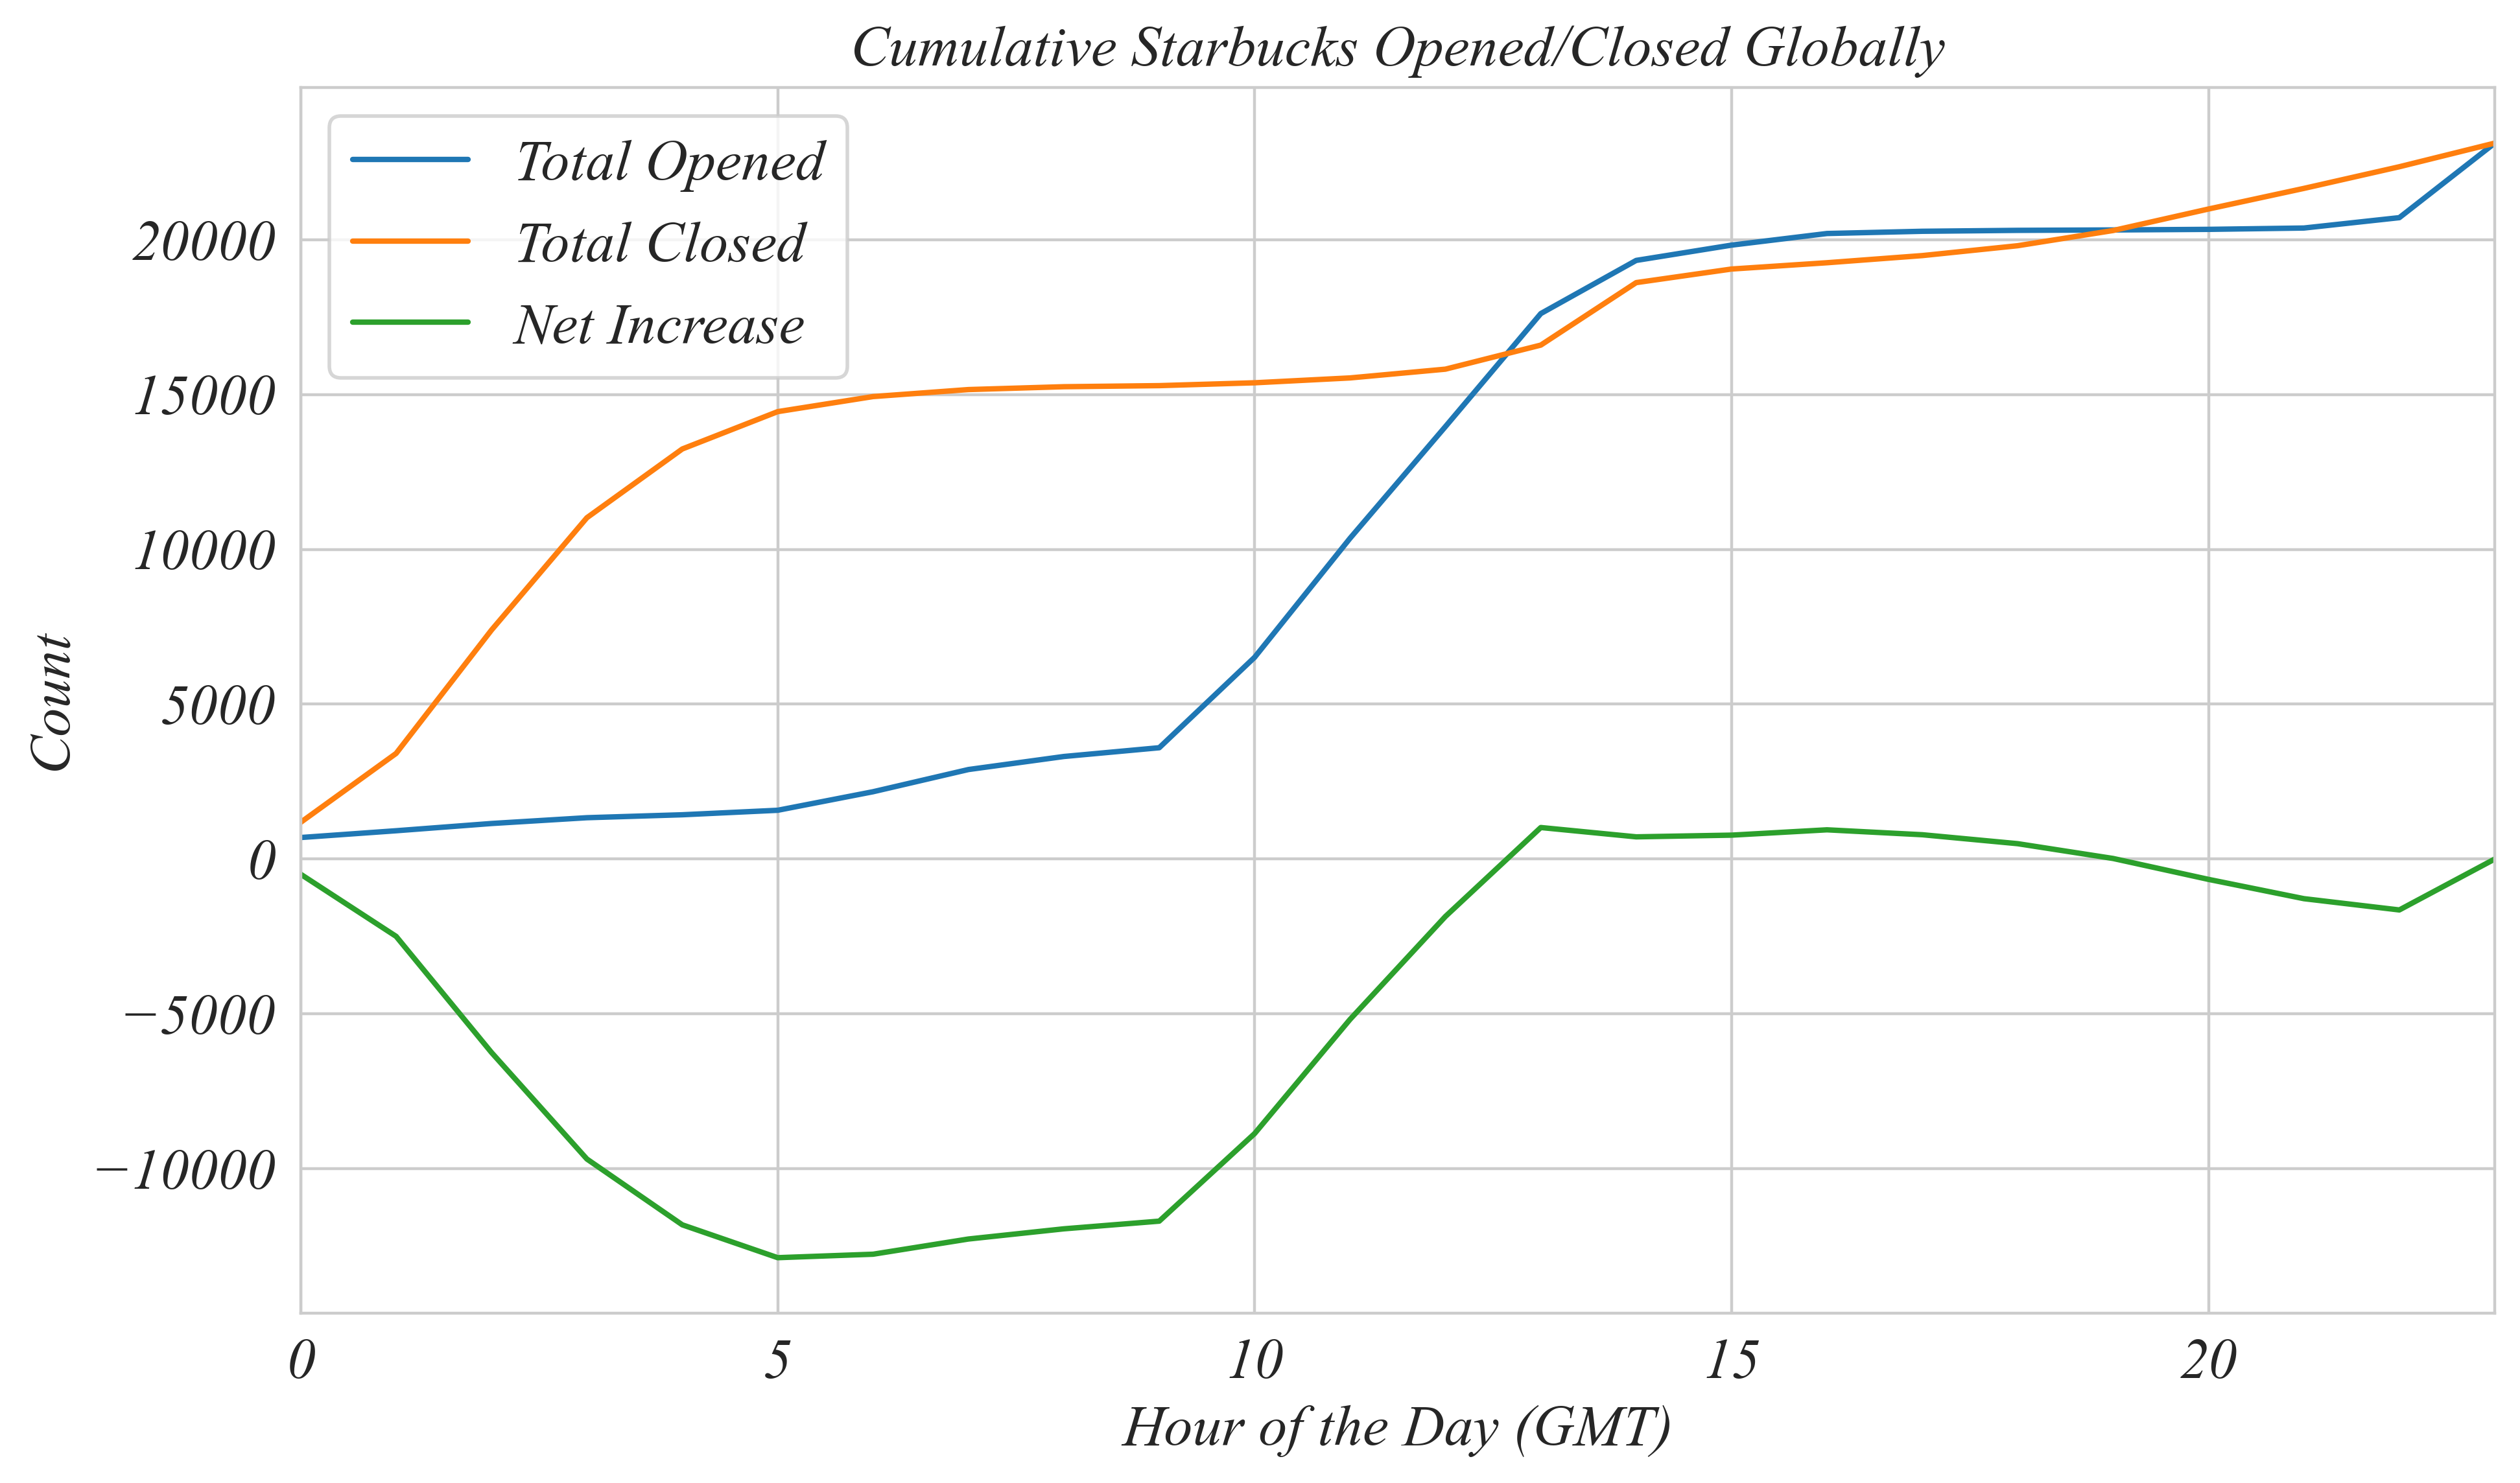

In [113]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['close_GMT'] = hours['close'] - hours['timezone']
hours['open_GMT'] = hours['open'] - hours['timezone']

def Normalize_GMT(number):
    if number >= 24:
        number = number - 24
    if number < 0:
        number = number + 24
    return number

hours['close_GMT'] = hours['close_GMT'].apply(Normalize_GMT)
hours['open_GMT'] = hours['open_GMT'].apply(Normalize_GMT)

bin_edges = np.arange(0, 25, 1)

close_counts, bin_edges = np.histogram(hours.close_GMT, bins=bin_edges)
open_counts, bin_edges = np.histogram(hours.open_GMT, bins=bin_edges)

totals = pd.DataFrame({
    'Bins': bin_edges[:-1],
    'Close Counts': close_counts,
    'Open Counts': open_counts
})

totals['Total Opened'] = totals['Open Counts'].cumsum()
totals['Total Closed'] = totals['Close Counts'].cumsum()

totals['Net Increase'] = totals['Total Opened'] - totals['Total Closed']

count_open_after_close = len(hours[hours['open_GMT'] >= hours['close_GMT']])

totals['Increase'] = count_open_after_close + totals['Total Opened'] - totals['Total Closed']

plt.plot(totals['Bins'], totals['Total Opened'], label='Total Opened')
plt.plot(totals['Bins'], totals['Total Closed'], label='Total Closed')
plt.plot(totals['Bins'], totals['Net Increase'], label='Net Increase')

plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Count')
plt.title('Cumulative Starbucks Opened/Closed Globally')
plt.xlim(0,23)
plt.legend()
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Difference_Line_GMT.png')


18094


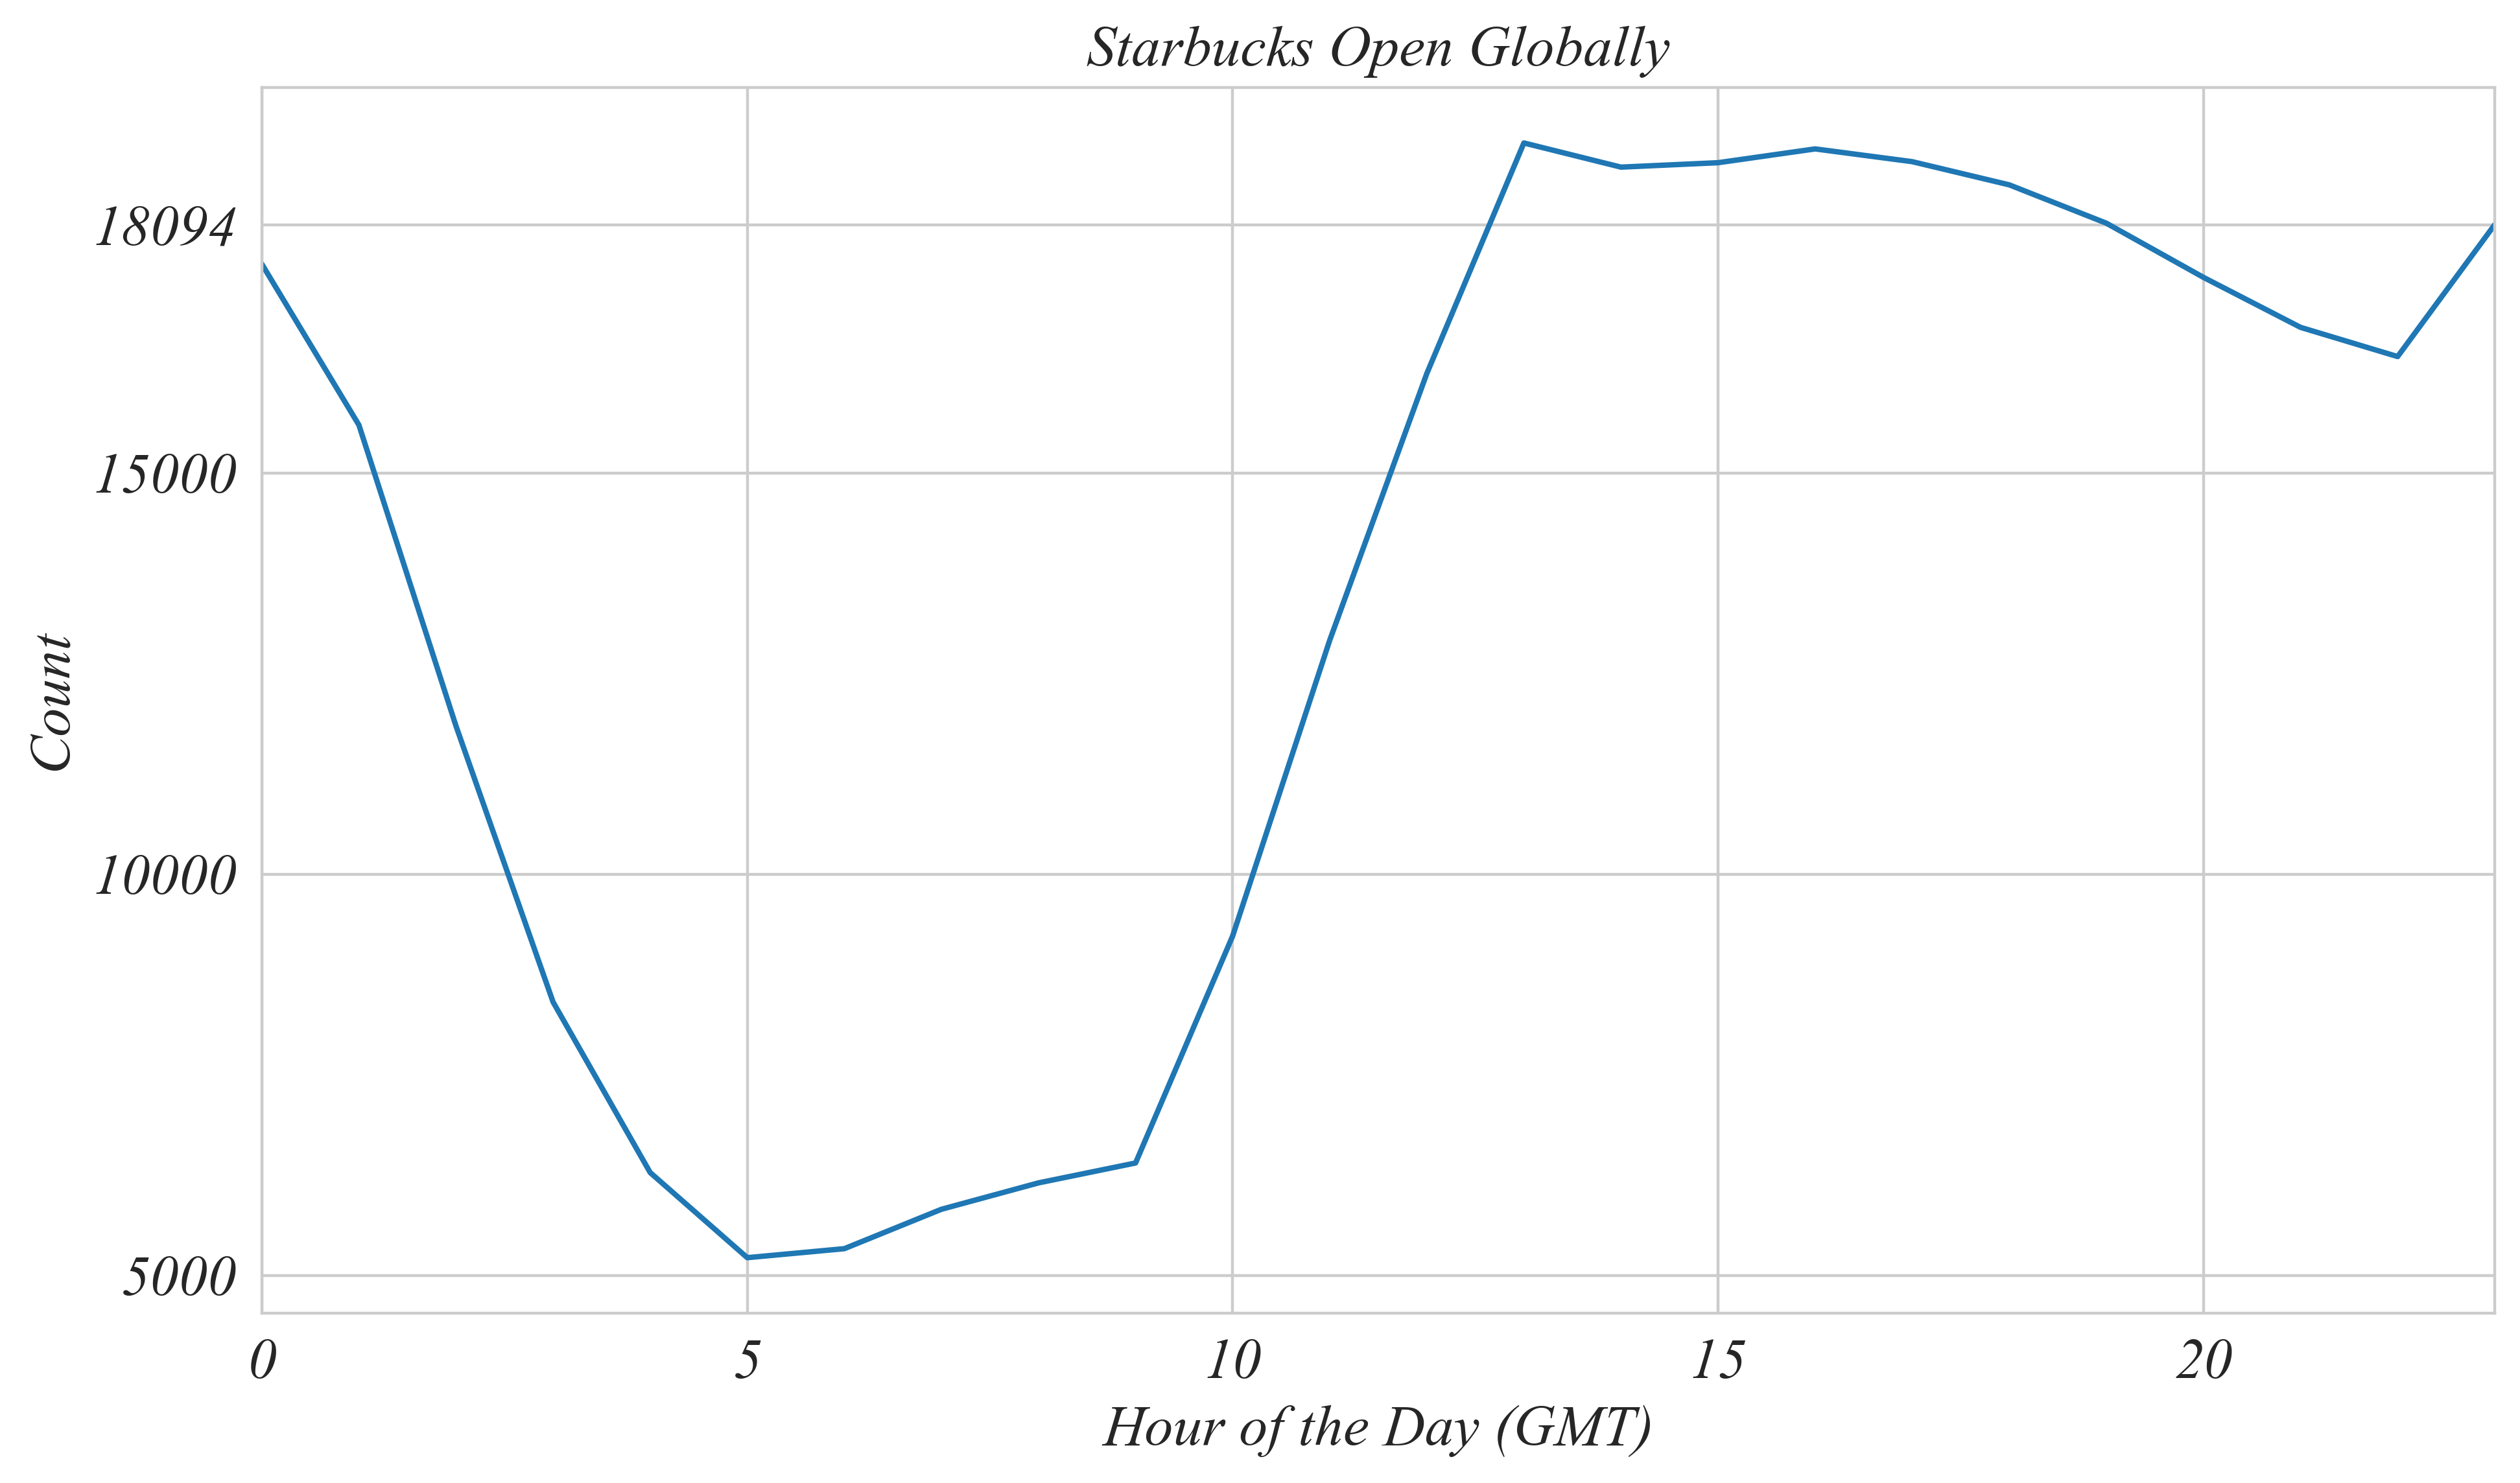

In [114]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

hours = pd.read_csv('Data/Part_1_4_Starbucks_Location_Hours.csv', index_col=0)

hours['close_GMT'] = hours['close'] - hours['timezone']
hours['open_GMT'] = hours['open'] - hours['timezone']

def Normalize_GMT(number):
    if number >= 24:
        number = number - 24
    if number < 0:
        number = number + 24
    return number

hours['close_GMT'] = hours['close_GMT'].apply(Normalize_GMT)
hours['open_GMT'] = hours['open_GMT'].apply(Normalize_GMT)

bin_edges = np.arange(0, 25, 1)

close_counts, bin_edges = np.histogram(hours.close_GMT, bins=bin_edges)
open_counts, bin_edges = np.histogram(hours.open_GMT, bins=bin_edges)

totals = pd.DataFrame({
    'Bins': bin_edges[:-1],
    'Close Counts': close_counts,
    'Open Counts': open_counts
})

totals['Total Opened'] = totals['Open Counts'].cumsum()
totals['Total Closed'] = totals['Close Counts'].cumsum()

totals['Net Increase'] = totals['Total Opened'] - totals['Total Closed']

count_open_after_close = len(hours[hours['open_GMT'] >= hours['close_GMT']])
print(count_open_after_close)

totals['Increase'] = count_open_after_close + totals['Total Opened'] - totals['Total Closed']

plt.plot(totals['Bins'], totals['Increase'])

plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Count')
plt.title('Starbucks Open Globally')
plt.xlim(0,23)
plt.yticks([5000,10000,15000,count_open_after_close])
plt.tight_layout()
plt.savefig('Figures/Part_1_6_Total_Open_Line_GMT.png')
